<a href="https://colab.research.google.com/github/Marcos-JV/project_airfoil/blob/main/Prediccion_para_perfiles_alares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
# Cargar archivos para alimentar la red desde Github 
! git clone https://github.com/Marcos-JV/project_airfoil.git

Cloning into 'project_airfoil'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
# Cordenadas de los perfiles
naca_0012 = np.loadtxt("/content/project_airfoil/NACA_0012_points.txt")
naca_2412 = np.loadtxt("/content/project_airfoil/NACA_2412_points.txt")
# Datos del perfil
''' Esquema de los datos 
    Columna 1 -> angulo; Columna 2 -> cl; Columna 3 -> cd; Columna 4 -> cdp
    Columna 5 -> cm; Columna 6 -> Top_Xtr; Columna 7 ->  Bot_Xtr'''
naca_0012_datos = np.loadtxt("/content/project_airfoil/naca_0012.txt", skiprows = 12)
naca_2412_datos = np.loadtxt("/content/project_airfoil/naca_2412.txt", skiprows = 12)
# Ajuste al tamaño de las cuerdas de cada perfil
# 1.13 m para el perfil de la punta
naca_0012 = naca_0012 * 1.13
# 1.62 m metros para el perfil de la raiz 
naca_2412 = naca_2412 * 1.62
# Delplazamiento de perfil y conservacion del conjunto original de cordenadas
# mediante la definicion de una nueva variable
m_1,n_1 = naca_0012.shape
naca_0012_d = np.zeros((m_1,n_1))
naca_0012_d[:, 0] = naca_0012[:, 0] -1.13
naca_0012_d[:, 1] = naca_0012[:, 1]
m_2,n_2 = naca_2412.shape
naca_2412_d = np.zeros((m_2,n_2))
naca_2412_d[:, 0] = naca_2412[:, 0] -1.62
naca_2412_d[:, 1] = naca_2412[:, 1]

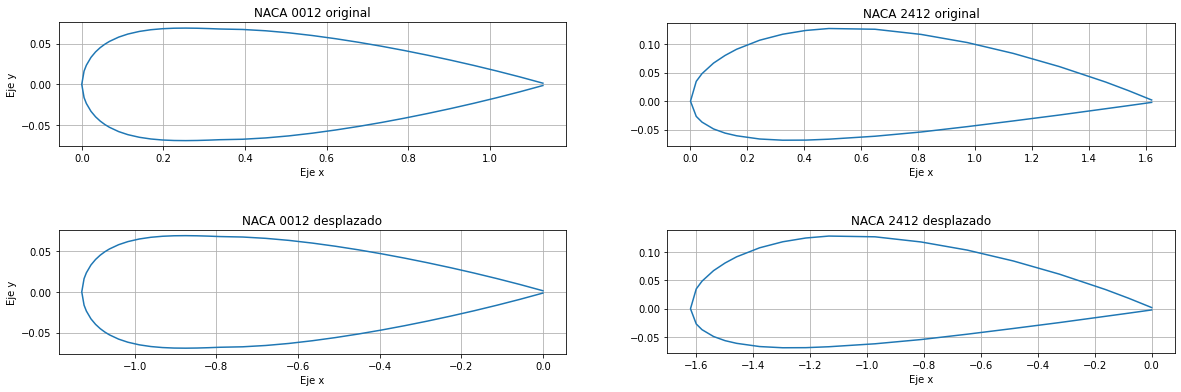

In [5]:
fig, ax = plt.subplots(2,2, figsize = (20,7))
ax[0,0].plot(naca_0012[:, 0], naca_0012[:, 1], linestyle='-')
ax[0,0].set_title("NACA 0012 original")
ax[0,0].set_xlabel("Eje x")
ax[0,0].set_ylabel("Eje y")
ax[0,0].set_aspect(2)
ax[0,0].grid(True)

ax[0,1].plot(naca_2412[:, 0], naca_2412[:, 1], linestyle='-')
ax[0,1].set_title("NACA 2412 original")
ax[0,1].set_xlabel("Eje x")
ax[0,1].set_aspect(2)
ax[0,1].grid(True)

ax[1,0].plot(naca_0012_d[:, 0], naca_0012_d[:, 1], linestyle='-')
ax[1,0].set_title("NACA 0012 desplazado")
ax[1,0].set_xlabel("Eje x")
ax[1,0].set_ylabel("Eje y")
ax[1,0].set_aspect(2)
ax[1,0].grid(True)

ax[1,1].plot(naca_2412_d[:, 0], naca_2412_d[:, 1], linestyle='-')
ax[1,1].set_title("NACA 2412 desplazado")
ax[1,1].set_xlabel("Eje x")
ax[1,1].set_aspect(2)
ax[1,1].grid(True)
plt.show()

In [6]:
# Rotacion de perfiles a sus respectivos angulos de ataque
teta_0012 = naca_0012_datos[:, 0]
teta_2412 = naca_2412_datos[:, 0]
def Rotacion(teta,naca, m_p, n_p):
  teta = np.radians(teta)
  n_t = len(teta)
  airfoil = np.zeros((n_t,m_p,n_p))
  for i in range(n_t):
    Q = np.array([[np.cos(teta[i]), -np.sin(teta[i])], [np.sin(teta[i]), np.cos(teta[i])]])
    airfoil [i] = naca @ Q
  return airfoil
airfoil_naca_0012 = Rotacion(teta_0012, naca_0012,m_1, n_1)
airfoil_naca_2412 = Rotacion(teta_2412, naca_2412, m_2, n_2)

Text(0.5, 0.98, 'Naca 0012 a direrentes angulos')

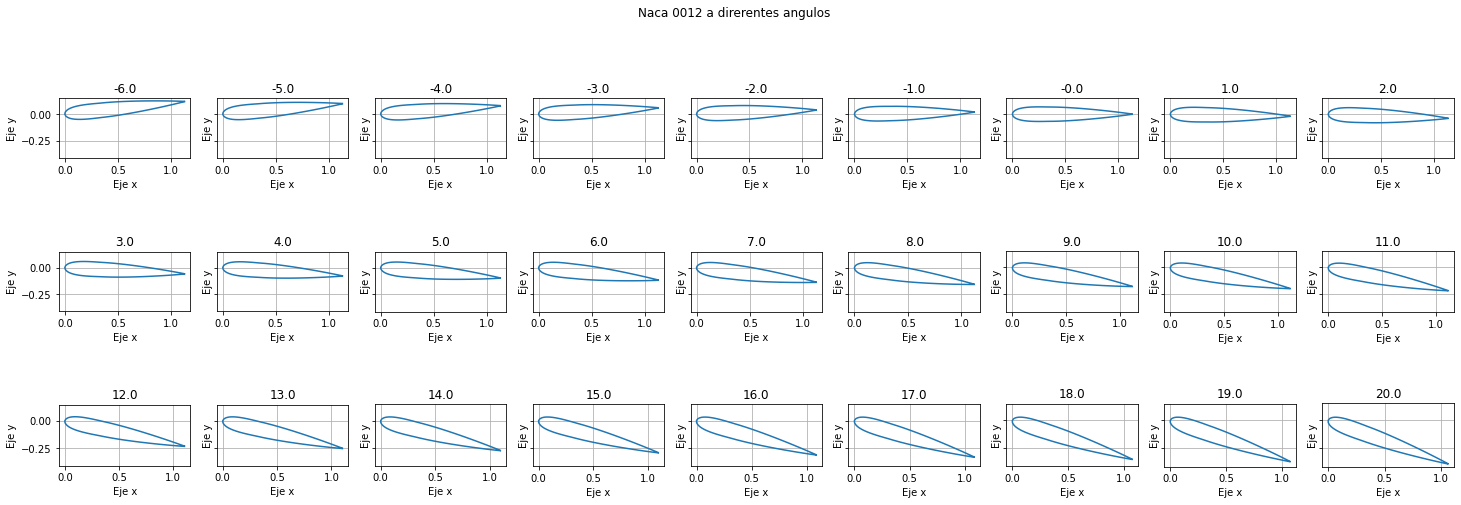

In [7]:
k = 0
fig, ax = plt.subplots(3,9, figsize = (25,8), sharey=True)
for j in range(3):
  for i in range(9):
    ax[j,i].plot(airfoil_naca_0012[k,:, 0], airfoil_naca_0012[k,:, 1], linestyle='-')
    ax[j,i].set_title(teta_0012[k])
    ax[j,i].set_xlabel("Eje x")
    ax[j,i].set_ylabel("Eje y")
    ax[j,i].set_aspect("equal")
    ax[j,i].grid(True)
    k += 1
fig.suptitle("Naca 0012 a direrentes angulos")

Text(0.5, 0.98, 'Naca 2412 a direrentes angulos')

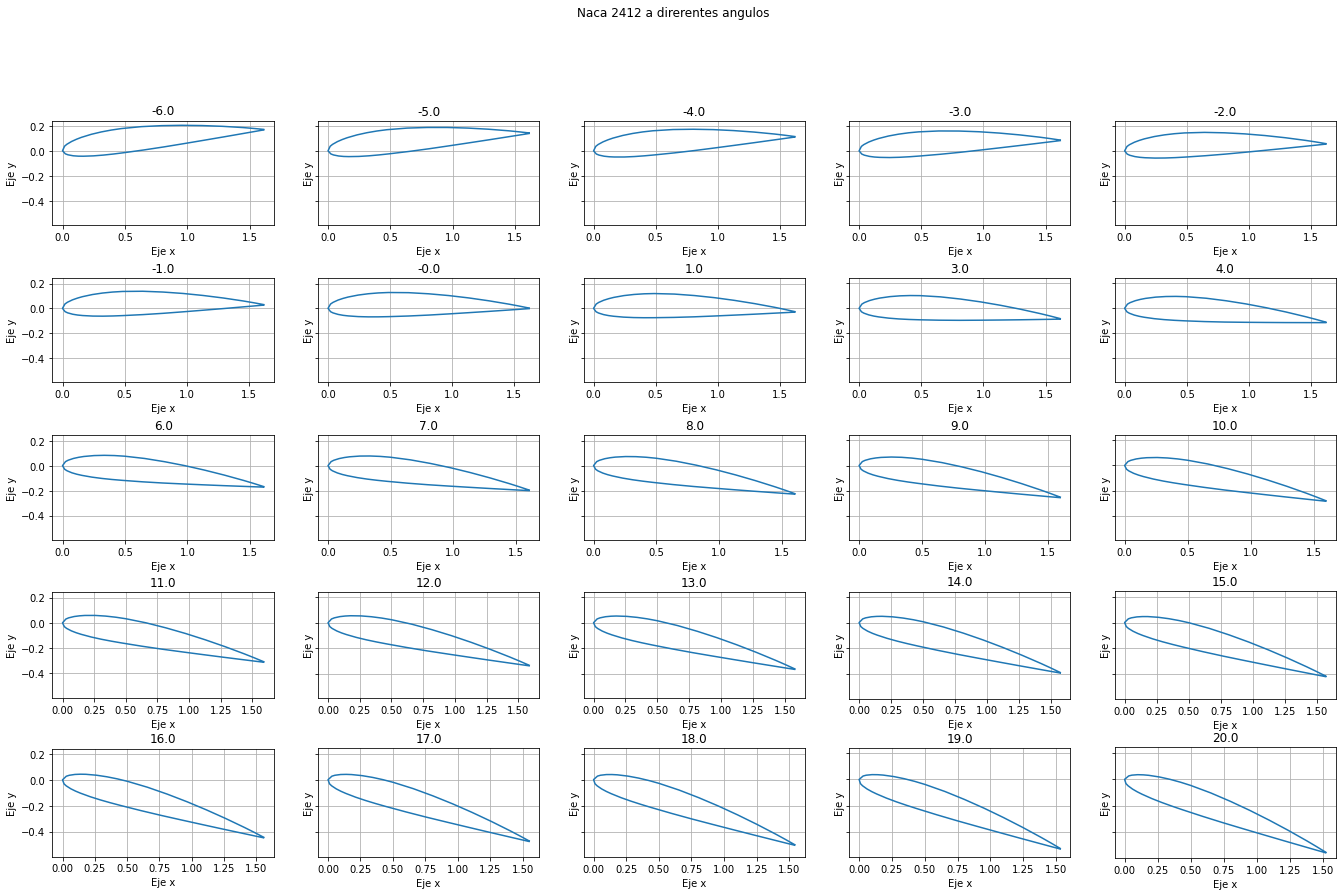

In [8]:
k = 0
fig, ax = plt.subplots(5,5, figsize = (23,14), sharey=True)
for j in range(5):
  for i in range(5):
    ax[j,i].plot(airfoil_naca_2412[k,:, 0], airfoil_naca_2412[k,:, 1], linestyle='-')
    ax[j,i].set_title(teta_2412[k])
    ax[j,i].set_xlabel("Eje x")
    ax[j,i].set_ylabel("Eje y")
    ax[j,i].set_aspect("equal")
    ax[j,i].grid(True)
    k += 1
fig.suptitle("Naca 2412 a direrentes angulos")

In [9]:
# cambiando la forma de los dotos para alimentar a la red
airfoil_naca_0012_reshape = airfoil_naca_0012.reshape((len(teta_0012), 2 * m_1))
airfoil_naca_2412_reshape = airfoil_naca_2412.reshape((len(teta_2412), 2 * m_2))
print("Numero de muestras del Naca 0012 = ", len(teta_0012), " Numero de caracteristicas (puntos) = ", m_1 )
print("Numero de muestras del Naca 2412 = ", len(teta_2412), " Numero de caracteristicas (puntos) = ", m_2 )

Numero de muestras del Naca 0012 =  27  Numero de caracteristicas (puntos) =  63
Numero de muestras del Naca 2412 =  25  Numero de caracteristicas (puntos) =  35


In [10]:
# Estracion de los objectivos del conjunto de datos
naca_0012_CL = naca_0012_datos[: , 1]
naca_0012_CD = naca_0012_datos[: , 2]
naca_2412_CL = naca_2412_datos[: , 1]
naca_2412_CD = naca_2412_datos[: , 2]
# preparando el conjunto de datos de entrenamiento y de prueba de la red
# Los conjuntos de datos son seleccionados aleatoriamente
x_train_0012, x_test_0012, y_train_0012, y_test_0012 = train_test_split(airfoil_naca_0012_reshape, naca_0012_CL, test_size = 0.33, random_state = 1)
x_train_2412, x_test_2412, y_train_2412, y_test_2412 = train_test_split(airfoil_naca_2412_reshape, naca_2412_CL, test_size = 0.33, random_state = 1)
# x_train_2412, x_test_2412, y_train_2412, y_test_2412 = train_test_split(airfoil_naca_2412_reshape, naca_2412_CL, test_size = 0.33, random_state = 1)

In [11]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(units = 30, activation = "relu"),
        Dense(units = 15, activation = "relu"),
        Dense(units = 1),
    ], name = "Model_CL"
)

In [ ]:
model.summary()

In [12]:
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(0.001),
)

In [13]:
history = model.fit(
    x_train_0012, y_train_0012,
    epochs = 400
)

Epoch 1/400
1/1 [==============================] - 1s 672ms/step - loss: 0.5427
Epoch 2/400
1/1 [==============================] - 0s 14ms/step - loss: 0.5091
Epoch 3/400
1/1 [==============================] - 0s 12ms/step - loss: 0.4905
Epoch 4/400
1/1 [==============================] - 0s 11ms/step - loss: 0.4833
Epoch 5/400
1/1 [==============================] - 0s 11ms/step - loss: 0.4745
Epoch 6/400
1/1 [==============================] - 0s 9ms/step - loss: 0.4622
Epoch 7/400
1/1 [==============================] - 0s 10ms/step - loss: 0.4476
Epoch 8/400
1/1 [==============================] - 0s 6ms/step - loss: 0.4323
Epoch 9/400
1/1 [==============================] - 0s 6ms/step - loss: 0.4178
Epoch 10/400
1/1 [==============================] - 0s 6ms/step - loss: 0.4047
Epoch 11/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3915
Epoch 12/400
1/1 [==============================] - 0s 10ms/step - loss: 0.3783
Epoch 13/400
1/1 [==============================] - 0

In [14]:
model.evaluate(x_test_0012, y_test_0012)

1/1 [==============================] - 0s 114ms/step - loss: 2.4154e-04


0.00024153724370989949

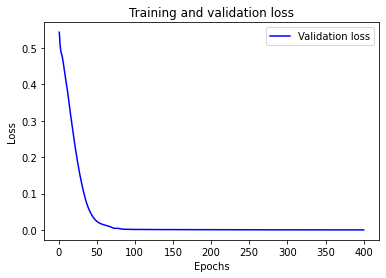

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
model.save("/content/drive/MyDrive/Model_CL")

In [17]:
datos_train = model.predict(x_train_0012)
datos_test = model.predict(x_test_0012)

1/1 [==============================] - 0s 19ms/step


In [18]:
def Tabla (datos_p, datos_r):
  m, n = datos_p.shape
  data_df = np.zeros((m, 3))
  data_df[:, 0] = datos_p.reshape(m,)
  data_df[:, 1] = datos_r 
  data_df[:, 2] = np.absolute(datos_p.reshape(m,) - datos_r)
  df = pd.DataFrame(
      data_df, 
      columns = ["Cl de la prediccion", "CL real", "Diferencia"]
  )
  return df

In [19]:
Tabla(datos_train, y_train_0012)

,Cl de la prediccion,CL real,Diferencia
0,-0.447020,-0.4390,0.008020
1,1.567223,1.5660,0.001223
2,-0.000673,0.0000,0.000673
3,1.379809,1.3798,0.000009
4,0.778696,0.7766,0.002096
5,0.110970,0.1113,0.000330
6,1.552303,1.5995,0.047197
7,-0.554146,-0.5448,0.009346
8,1.109661,1.1093,0.000361
9,-0.642041,-0.6519,0.009859


In [20]:
Tabla(datos_test, y_test_0012)

,Cl de la prediccion,CL real,Diferencia
0,1.206592,1.1995,0.007092
1,0.889312,0.9073,0.017988
2,1.299193,1.2927,0.006493
3,-0.335535,-0.3314,0.004135
4,1.560863,1.5968,0.035937
5,0.445495,0.4390,0.006495
6,1.444480,1.4616,0.017120
7,1.508707,1.5192,0.010493
8,-0.223960,-0.2220,0.001960


1/1 [==============================] - 0s 16ms/step


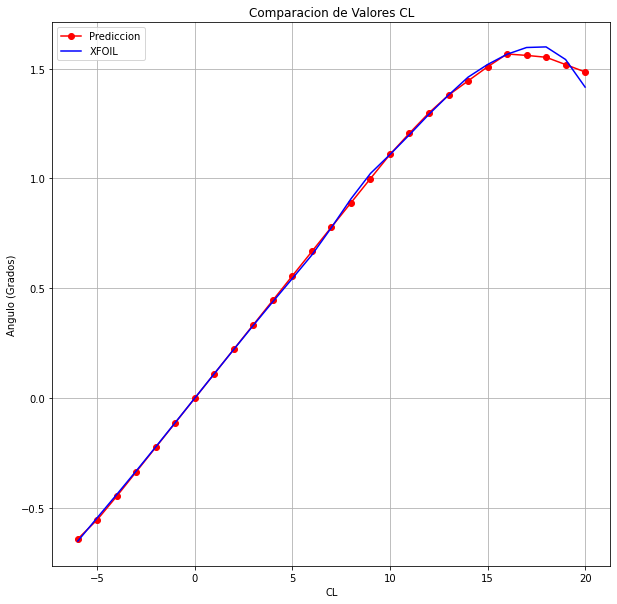

In [21]:
predicction = model.predict(airfoil_naca_0012_reshape)
fig, ax = plt.subplots(1,1, figsize = (10,10), sharey=True)
ax.plot(teta_0012, predicction, color = "red",  marker='o',label = "Prediccion", )
ax.plot(teta_0012, naca_0012_CL, color = "blue", label = "XFOIL")
ax.set_title("Comparacion de Valores CL")
ax.set_xlabel("CL")
ax.set_ylabel("Angulo (Grados)")
ax.grid(True)
plt.legend()
plt.show()